<a href="https://colab.research.google.com/github/yunhui666/Deloitte2022_March_Madness_Competition/blob/main/MarchMadnessCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
import math

In [ ]:
pip install tensorflow

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving NCAA_Tourney_2002_2021.csv to NCAA_Tourney_2002_2021 (5).csv


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving NCAA_Tourney_2022.csv to NCAA_Tourney_2022 (5).csv


In [ ]:
df = pd.read_csv('NCAA_Tourney_2002_2021.csv')
df2022= pd.read_csv('NCAA_Tourney_2022.csv')

In [ ]:
df.head(5)

,team1_id,team1_score,team2_id,team2_score,WLoc,num_ot,team1_position,team2_position,team1_seed,team2_seed,...,team1_adjoe,team1_de,team1_adjde,team2_tempo,team2_adjtempo,team2_oe,team2_adjoe,team2_de,team2_adjde,game_id
0,1211,85,1425,66,N,0,X01,X06,1,6,...,126.808,91.6576,88.7549,67.5611,67.2953,108.537,113.579,94.8746,89.9260,2021-1211-1425
1,1211,83,1166,65,N,0,X01,X05,1,5,...,126.808,91.6576,88.7549,69.5619,69.0682,109.643,115.567,97.5105,92.8330,2021-1211-1166
2,1425,82,1332,78,N,0,X06,X07,6,7,...,113.579,94.8746,89.9260,67.8562,67.2410,109.767,115.149,99.8891,96.0406,2021-1425-1332
3,1211,87,1328,71,N,0,X01,X08,1,8,...,126.808,91.6576,88.7549,69.1751,67.6945,106.109,112.124,98.5625,94.0513,2021-1211-1328
4,1332,95,1234,80,N,0,X07,X02,7,2,...,115.149,99.8891,96.0406,70.9678,69.9884,117.408,124.192,101.0740,93.8602,2021-1332-1234


In [ ]:
df2022.head(5)

,game_id,team1_id,team2_id,season,team1_seed,team2_seed,team1_position,team2_position,strongseed,weakseed,...,team2_lat,team2_long,team1_coaches_preseason,team2_coaches_preseason,team1_ap_preseason,team2_ap_preseason,team1_coaches_final,team2_coaches_final,team1_ap_final,team2_ap_final
0,2022-1124-1246,1124,1246,2022,1,2,W01,W02,1,2,...,38.028081,-84.510698,8.0,11.0,8.0,10.0,4.0,6.0,4.0,7.0
1,2022-1124-1345,1124,1345,2022,1,3,W01,W03,1,3,...,40.428206,-86.914435,8.0,7.0,8.0,7.0,4.0,9.0,4.0,10.0
2,2022-1124-1417,1124,1417,2022,1,4,W01,W04,1,4,...,34.068892,-118.443901,8.0,2.0,8.0,2.0,4.0,12.0,4.0,11.0
3,2022-1124-1388,1124,1388,2022,1,5,W01,W05,1,5,...,29.451793,-98.564307,8.0,NaN,8.0,NaN,4.0,16.0,4.0,18.0
4,2022-1124-1400,1124,1400,2022,1,6,W01,W06,1,6,...,30.284730,-97.737277,8.0,5.0,8.0,5.0,4.0,25.0,4.0,25.0


In [ ]:
# columns 0-12 is team 1; 13-25 is team 2
feature = ['team1_score','team1_seed','team1_fg2pct','team1_fg3pct', 'team1_ftpct','team1_oppfg2pct','team1_oppfg3pct',
           
           'team1_oppftpct','team1_adjtempo','team1_adjoe', 'team1_adjde','team1_pt_overall_s16', 'team1_pt_overall_ff',
          
           'team2_score','team2_seed','team2_fg2pct','team2_fg3pct', 'team2_ftpct','team2_oppfg2pct','team2_oppfg3pct',
           
           'team2_oppftpct','team2_adjtempo','team2_adjoe', 'team2_adjde','team2_pt_overall_s16', 'team2_pt_overall_ff',
          
           'game_id']
features = ['team1_score','team1_seed','team1_fg2pct','team1_fg3pct', 'team1_ftpct','team1_oppfg2pct','team1_oppfg3pct',
           
           'team1_oppftpct','team1_adjtempo','team1_adjoe', 'team1_adjde','team1_pt_overall_s16', 'team1_pt_overall_ff',
          
           'team2_score','team2_seed','team2_fg2pct','team2_fg3pct', 'team2_ftpct','team2_oppfg2pct','team2_oppfg3pct',
           
           'team2_oppftpct','team2_adjtempo','team2_adjoe', 'team2_adjde','team2_pt_overall_s16', 'team2_pt_overall_ff',
          
           'game_id']
df = df[feature]

# 2. swap

In [ ]:
np.random.seed(42)
idx = np.random.rand(len(df))<0.5
for i in range(13):
    df.iloc[idx,[i,i+13]] = df.iloc[idx,[i+13,i]].to_numpy()
# 交换一半的数据使数据集有一半1和一半0，

# 3. Add y column

In [ ]:
df['result'] = (df['team1_score']>df['team2_score']).astype(int)
print(df['result'])
game=df['game_id'].to_frame()

0       0
1       1
2       1
3       1
4       0
       ..
1241    1
1242    1
1243    1
1244    1
1245    1
Name: result, Length: 1246, dtype: int64


# 4. Remove score and game id columns

In [ ]:
df1=df.drop(['game_id','team1_score','team2_score'],axis=1,inplace=True)
#game=df_test['game_id']
#df_test.drop(['game_id'],axis=1,inplace=True)

# 5. Feature selection

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt
print(x.shape)
x = df.iloc[:,1:24]
y = df['result']
print(x.shape,x.shape)
print(x.columns.values,'\n\n',x.columns.values)

(1246, 6)
(1246, 23) (1246, 23)
['team1_fg2pct' 'team1_fg3pct' 'team1_ftpct' 'team1_oppfg2pct'
 'team1_oppfg3pct' 'team1_oppftpct' 'team1_adjtempo' 'team1_adjoe'
 'team1_adjde' 'team1_pt_overall_s16' 'team1_pt_overall_ff' 'team2_seed'
 'team2_fg2pct' 'team2_fg3pct' 'team2_ftpct' 'team2_oppfg2pct'
 'team2_oppfg3pct' 'team2_oppftpct' 'team2_adjtempo' 'team2_adjoe'
 'team2_adjde' 'team2_pt_overall_s16' 'team2_pt_overall_ff'] 

 ['team1_fg2pct' 'team1_fg3pct' 'team1_ftpct' 'team1_oppfg2pct'
 'team1_oppfg3pct' 'team1_oppftpct' 'team1_adjtempo' 'team1_adjoe'
 'team1_adjde' 'team1_pt_overall_s16' 'team1_pt_overall_ff' 'team2_seed'
 'team2_fg2pct' 'team2_fg3pct' 'team2_ftpct' 'team2_oppfg2pct'
 'team2_oppfg3pct' 'team2_oppftpct' 'team2_adjtempo' 'team2_adjoe'
 'team2_adjde' 'team2_pt_overall_s16' 'team2_pt_overall_ff']


In [ ]:
clf = RandomForestClassifier(n_estimators=100)
clf.fit(x, y)
# Print the name and gini importance of each feature
for feature in zip(features, clf.feature_importances_):
    print(feature)

('team1_score', 0.03988641735498246)
('team1_seed', 0.043490129647900826)
('team1_fg2pct', 0.039709234892694636)
('team1_fg3pct', 0.04118132154178959)
('team1_ftpct', 0.03944359669956939)
('team1_oppfg2pct', 0.03694574537325151)
('team1_oppfg3pct', 0.03805410566701758)
('team1_oppftpct', 0.08035978070661581)
('team1_adjtempo', 0.06771666404659848)
('team1_adjoe', 0.04072794323950016)
('team1_adjde', 0.019331431954749182)
('team1_pt_overall_s16', 0.08188952304176383)
('team1_pt_overall_ff', 0.039119658976477165)
('team2_score', 0.032077816632761685)
('team2_seed', 0.03680932444372943)
('team2_fg2pct', 0.04025919798657538)
('team2_fg3pct', 0.04182926353130195)
('team2_ftpct', 0.03548296574533403)
('team2_oppfg2pct', 0.03664382037474103)
('team2_oppfg3pct', 0.06845913381810459)
('team2_oppftpct', 0.0592512950901022)
('team2_adjtempo', 0.027168850256292627)
('team2_adjoe', 0.014162778978146502)


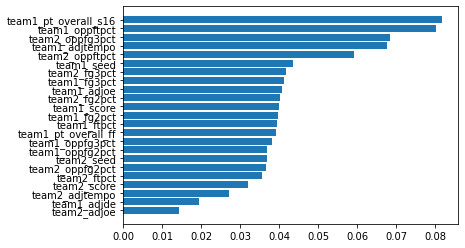

In [ ]:
f_i = list(zip(features,clf.feature_importances_))
f_i.sort(key = lambda x : x[1])
plt.barh([x[0] for x in f_i],[x[1] for x in f_i])
plt.show()

In [ ]:
sel = SelectFromModel(RandomForestClassifier(n_estimators=100))
sel.fit(x,y)
sel.get_support()
selected_features = x.columns[(sel.get_support())]
print(selected_features)
x=x[selected_features]
# x['game_id']=
print(x.shape)

Index(['team1_oppfg2pct', 'team1_adjoe', 'team1_adjde', 'team2_seed',
       'team2_adjoe', 'team2_adjde'],
      dtype='object')
(1246, 6)


# 6. PCA

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

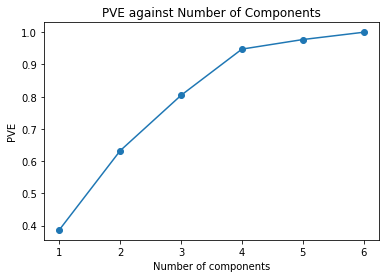

In [ ]:
# Make a plot of PVE with PVE on y axis and number of components on x axis
X = np.array(df[selected_features])
pca_full = PCA(6)
pca_full.fit(X)
cumsum = np.cumsum(pca_full.explained_variance_ratio_)
plt.plot(range(1,7),cumsum,marker='o')
plt.xlabel('Number of components')
plt.ylabel('PVE')
plt.title('PVE against Number of Components')
plt.show()

In [ ]:
#X = np.array(df)
#pca = PCA(n_components=4)
#X_pca = pca.fit_transform(X)

#X_2019 = np.array(df_2019)
#X_pca_2019 = pca.transform(X_2019)

# 5. Model

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import log_loss

In [ ]:
# Logistic
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

LogisticRegression()

In [ ]:

y_game=game.iloc[y_test.index,:]

In [ ]:
y_pred_logit = logreg.predict(x_test)
y_proba_logit = list(logreg.predict_proba(x_test)[:,1])
print(classification_report(y_test, y_pred_logit))

              precision    recall  f1-score   support

           0       0.71      0.69      0.70       183
           1       0.71      0.73      0.72       191

    accuracy                           0.71       374
   macro avg       0.71      0.71      0.71       374
weighted avg       0.71      0.71      0.71       374



In [ ]:
accuracy_score = logreg.score(x_test, y_test)
print(accuracy_score)

0.7112299465240641


In [ ]:
print(log_loss(y_test,y_proba_logit,labels=[0,1]))

0.5641403303529975


In [ ]:
# random forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=1, random_state=8).fit(x_train,y_train)
y_pred_rf = rf.predict(x_test)
y_proba_rf = list(rf.predict_proba(x_test)[:,1])
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.71      0.65      0.68       183
           1       0.69      0.75      0.72       191

    accuracy                           0.70       374
   macro avg       0.70      0.70      0.70       374
weighted avg       0.70      0.70      0.70       374



In [ ]:
score = rf.score(x_test, y_test)
print(score)

0.7005347593582888


In [ ]:
print(log_loss(y_test,y_proba_rf,labels=[0,1]))

0.6268059524476608


In [ ]:
#gaussian naive bayes
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB().fit(x_train,y_train)
y_pred_nb =  classifier.predict(x_test)
y_proba_nb = classifier.predict_proba(x_test)[:,1]
print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

           0       0.72      0.72      0.72       183
           1       0.73      0.73      0.73       191

    accuracy                           0.72       374
   macro avg       0.72      0.72      0.72       374
weighted avg       0.72      0.72      0.72       374



In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_nb))

Accuracy: 0.7219251336898396


In [ ]:
print(log_loss(y_test,y_proba_nb,labels=[0,1]))

0.6103073394007402


In [ ]:
#nearest neighbor
from sklearn.neighbors import KNeighborsClassifier
k=20
knn = KNeighborsClassifier(n_neighbors=k).fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)
y_proba_knn = knn.predict_proba(x_test)[:,1]
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.70      0.69      0.70       183
           1       0.71      0.71      0.71       191

    accuracy                           0.70       374
   macro avg       0.70      0.70      0.70       374
weighted avg       0.70      0.70      0.70       374



In [ ]:
score = knn.score(x_test, y_test)
print(score)

0.7032085561497327


In [ ]:
print(log_loss(y_test,y_proba_knn,labels=[0,1]))

0.7316294958825319


In [ ]:
#SVM
from sklearn import svm
clf = svm.SVC()
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
print(classification_report(y_test, y_pred4))

In [ ]:
print(x_train.shape)

(872, 23)


deep neural network

In [ ]:
model = Sequential()
model.add(Dense(12, input_dim=6, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=50, batch_size=10,verbose=1)
loss, accuracy = model.evaluate(x_train, y_train)
print(accuracy,loss)
y_pred_dnn = list(model.predict(x_test))
print(y_pred_dnn)

Epoch 1/50
88/88 [==============================] - 1s 2ms/step - loss: 3.3712 - accuracy: 0.4083
Epoch 2/50
88/88 [==============================] - 0s 2ms/step - loss: 1.2798 - accuracy: 0.3452
Epoch 3/50
88/88 [==============================] - 0s 2ms/step - loss: 1.1518 - accuracy: 0.4002
Epoch 4/50
88/88 [==============================] - 0s 2ms/step - loss: 1.0049 - accuracy: 0.4300
Epoch 5/50
88/88 [==============================] - 0s 2ms/step - loss: 0.9470 - accuracy: 0.4690
Epoch 6/50
88/88 [==============================] - 0s 2ms/step - loss: 0.7989 - accuracy: 0.5287
Epoch 7/50
88/88 [==============================] - 0s 2ms/step - loss: 0.7533 - accuracy: 0.5539
Epoch 8/50
88/88 [==============================] - 0s 2ms/step - loss: 0.7251 - accuracy: 0.5940
Epoch 9/50
88/88 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.6193
Epoch 10/50
88/88 [==============================] - 0s 2ms/step - loss: 0.6647 - accuracy: 0.6112
Epoch 11/50
88/88 [

In [ ]:
print(y_pred_dnn[1][0])

0.7842026


gradiant boosting tree

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gbt = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0).fit(x_train, y_train)
y_pred_gbt=gbt.predict(x_test)
y_proba_gbt=list(gbt.predict_proba(x_test)[:,1])
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.70      0.69      0.70       183
           1       0.71      0.71      0.71       191

    accuracy                           0.70       374
   macro avg       0.70      0.70      0.70       374
weighted avg       0.70      0.70      0.70       374



In [ ]:
score = gbt.score(x_test, y_test)
print(score)

0.6657754010695187


In [ ]:
print(log_loss(y_test,y_proba_gbt,labels=[0,1]))

0.6618468250241061


In [ ]:
print(type(y_pred_dnn[0]))
l=[(y_proba_logit[i]+y_proba_rf[i]+y_pred_dnn[i][0]+y_proba_gbt[i])/4 for i in range(len(y_pred_dnn))]
print(l)

<class 'numpy.ndarray'>
[0.8940833088763207, 0.6807852265783945, 0.5928265931738179, 0.6584735314950645, 0.4209952743555957, 0.5723059365471351, 0.7177068759444589, 0.8074017787078689, 0.34759240217845544, 0.7092197170879496, 0.7773180006119226, 0.37218936875804, 0.5924480415141469, 0.552368872227801, 0.5723558125912961, 0.6331219235148922, 0.3310517107488199, 0.1873198892310971, 0.38615315946760753, 0.4527298464680327, 0.46891365726234846, 0.8154305023105072, 0.8204844866667127, 0.7392277882951666, 0.7667295432948559, 0.8408923616653621, 0.5163764808015634, 0.852391996200866, 0.33650893370960266, 0.65191446435289, 0.7842249342853131, 0.3540098464637263, 0.673260760561215, 0.2208174887278251, 0.8464921631511506, 0.49536746141286553, 0.09938446328151361, 0.1541050300447149, 0.6520836552998354, 0.6743747435503913, 0.2594414975188723, 0.12511310327895342, 0.5903085582401549, 0.7243602208276715, 0.8710631650931082, 0.45189234888732427, 0.3019199079629745, 0.7301790893357372, 0.757095846540

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving NCAA_Tourney_2002_2021.csv to NCAA_Tourney_2002_2021 (6).csv


In [ ]:
y_game['probability']=l


             game_id  probability
1068  2016-1292-1277     0.894083
124   2019-1345-1397     0.680785
184   2002-1245-1338     0.592827
553   2008-1390-1266     0.658474
18    2021-1124-1458     0.420995
...              ...          ...
526   2008-1345-1124     0.472118
571   2008-1172-1458     0.406647
367   2005-1181-1280     0.767089
717   2011-1163-1137     0.805536
963   2014-1112-1361     0.307249

[374 rows x 2 columns]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
from google.colab import files
y_game.to_csv('new.csv') 
files.download('new.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#2022 Test

In [ ]:
x_train1=x[selected_features]
x_test1=df2022[selected_features]
y_train1=y


# 5. Model

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import log_loss

In [ ]:
# Logistic
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [ ]:

y_game=game.iloc[y_test.index,:]

In [ ]:
logreg = LogisticRegression()
logreg.fit(x_train1, y_train1)
y_pred_logit1 = logreg.predict(x_test1)
y_proba_logit1 = list(logreg.predict_proba(x_test1)[:,1])
print(y_proba_logit1)
# print(classification_report(y_test1, y_pred_logit))

[0.49218536328715284, 0.5909432145914677, 0.5598322573912738, 0.6802495812585974, 0.6809000939649378, 0.7634781396850162, 0.7792220697340662, 0.8181673459713291, 0.7629044638787822, 0.7803462127951573, 0.8529319167744571, 0.8312628579835172, 0.9357911444570811, 0.9466283291875224, 0.9387419401576073, 0.959064553478986, 0.5019505579690962, 0.5400674056513088, 0.7343531534336799, 0.7732258309247358, 0.6109400699182477, 0.7063383701161067, 0.7940036444304518, 0.7464749957456526, 0.8256898770461213, 0.8430472595631875, 0.8359208650621243, 0.8885725236025657, 0.8763122361311774, 0.9351963996444865, 0.9481292885234482, 0.9640722175114069, 0.9766845765162268, 0.46385240369578234, 0.5472857683082683, 0.5478075862077524, 0.6712313180592807, 0.5509864442723764, 0.7618656612911742, 0.772323092874892, 0.7961003009292105, 0.8058245303273838, 0.7737590624435137, 0.8128389177209421, 0.8417235384788608, 0.8785315176694556, 0.9441675552696659, 0.9478670822822638, 0.9623341998246026, 0.9627609912377434,

In [ ]:
# random forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=1, random_state=8).fit(x_train1,y_train1)
y_pred_rf1 = rf.predict(x_test1)
y_proba_rf1 = list(rf.predict_proba(x_test1)[:,1])
print(y_proba_rf1)
print(len(y_proba_rf1))
# print(classification_report(y_test, y_pred_rf))

[0.4347359690631351, 0.4535949931235947, 0.42628230957575725, 0.5136485985362689, 0.531204239062491, 0.5687381205690305, 0.5943376781360955, 0.6249431103737095, 0.6044433466578656, 0.5966849166137405, 0.6293398592681395, 0.6226134253863795, 0.649926108934217, 0.649926108934217, 0.6431131891022234, 0.649926108934217, 0.4467820732916011, 0.42628230957575725, 0.47504026705157054, 0.4622963418201411, 0.5127030883241371, 0.5664084355817005, 0.5687381205690305, 0.6158694380143046, 0.6226134253863795, 0.603497836445734, 0.6226134253863795, 0.631756030205703, 0.603497836445734, 0.6465505134530681, 0.649926108934217, 0.649926108934217, 0.649926108934217, 0.42628230957575725, 0.44213696268282127, 0.45454050333572643, 0.4467820732916011, 0.4853904047762996, 0.5472928466410548, 0.5472928466410548, 0.6209475020205338, 0.6276914893926088, 0.6100956105266087, 0.603497836445734, 0.603497836445734, 0.631756030205703, 0.649926108934217, 0.649926108934217, 0.649926108934217, 0.649926108934217, 0.42628230

In [ ]:
#gaussian naive bayes
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB().fit(x_train1,y_train1)
y_pred_nb1 =  classifier.predict(x_test1)
y_proba_nb1 = classifier.predict_proba(x_test1)[:,1]
print(y_proba_nb1)
print(len(y_proba_nb1))

[0.22456278 0.39180323 0.28268226 ... 0.84973953 0.8873589  0.84099152]
2278


deep neural network

In [ ]:
model = Sequential()
model.add(Dense(12, input_dim=6, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(x_train1, y_train1, epochs=50, batch_size=10,verbose=1)
loss, accuracy = model.evaluate(x_train1, y_train1)
print(accuracy,loss)
y_pred_dnn1 = list(model.predict(x_test1))
y_pred_dnn1=[i[0] for i in y_pred_dnn1]
print(y_pred_dnn1)

Epoch 1/50
125/125 [==============================] - 1s 2ms/step - loss: 2.0307 - accuracy: 0.4350
Epoch 2/50
125/125 [==============================] - 0s 3ms/step - loss: 0.8391 - accuracy: 0.4791
Epoch 3/50
125/125 [==============================] - 0s 3ms/step - loss: 0.7591 - accuracy: 0.5393
Epoch 4/50
125/125 [==============================] - 0s 3ms/step - loss: 0.7719 - accuracy: 0.5594
Epoch 5/50
125/125 [==============================] - 0s 3ms/step - loss: 0.7413 - accuracy: 0.5778
Epoch 6/50
125/125 [==============================] - 0s 3ms/step - loss: 0.6895 - accuracy: 0.6204
Epoch 7/50
125/125 [==============================] - 0s 3ms/step - loss: 0.6958 - accuracy: 0.6212
Epoch 8/50
125/125 [==============================] - 0s 3ms/step - loss: 0.6682 - accuracy: 0.6388
Epoch 9/50
125/125 [==============================] - 0s 3ms/step - loss: 0.6617 - accuracy: 0.6421
Epoch 10/50
125/125 [==============================] - 0s 2ms/step - loss: 0.7139 - accuracy: 0.6148

gradiant boosting tree

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gbt = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0).fit(x_train1, y_train1)
y_pred_gbt1=gbt.predict(x_test1)
y_proba_gbt1=list(gbt.predict_proba(x_test1)[:,1])
print(y_proba_gbt1)
# print(classification_report(y_test1, y_pred_knn1))

[0.5800061535532768, 0.24102229763441047, 0.36805074552380007, 0.5992641112769408, 0.6615201600254448, 0.7838259853923291, 0.7402842232049719, 0.7653829542007468, 0.6477078192626562, 0.7899018538162093, 0.7653829542007468, 0.7668071310261843, 0.9735575465883023, 0.9094648180184972, 0.9411811192173527, 0.9737123815785599, 0.5800061535532768, 0.5504738106262145, 0.6545432929493137, 0.752583524132352, 0.3499216132013405, 0.8596753023952939, 0.7350558139711544, 0.29400070896721753, 0.7668071310261843, 0.8294870353005667, 0.7309489759836054, 0.8084676495097819, 0.9314581373417684, 0.9735575465883023, 0.9735575465883023, 0.9836051364065497, 0.994721057242961, 0.4967485349202552, 0.4965358665302213, 0.5784659372722143, 0.5344826000996148, 0.4967777675988726, 0.7900729832176593, 0.7032454324507486, 0.7964381641782122, 0.7668071310261843, 0.6477078192626562, 0.7926572255093776, 0.8125676837874785, 0.8676243852523425, 0.9735575465883023, 0.9735575465883023, 0.9783103058619317, 0.9926879033346687

In [ ]:
l=[(y_proba_logit1[i]+y_proba_rf1[i]+y_pred_dnn1[i]+y_proba_gbt1[i])/4 for i in range(len(y_pred_dnn1))]
print(l)

[0.49872226904840855, 0.460409362305958, 0.48169666450271265, 0.6014943581874159, 0.6338033500736737, 0.7074390921046481, 0.7174598111663053, 0.7485850152865546, 0.7058268271857344, 0.7527482020421623, 0.7789698675679312, 0.7702404754003965, 0.8638384509476207, 0.8537119382683049, 0.8601065593441035, 0.8801235382692114, 0.4927234545409912, 0.4968776468503784, 0.600529564196196, 0.6461617604991763, 0.5295418420508804, 0.6959955291547374, 0.703541131416968, 0.5950387452555393, 0.7478359074293075, 0.7764839632797188, 0.7552160872417248, 0.8004501301504202, 0.8278574286660407, 0.867353869466676, 0.8745869968929159, 0.8831857052239611, 0.8899517633739662, 0.4559306028737925, 0.49362718846905373, 0.5223340151267748, 0.558771315033721, 0.5379586393370199, 0.6958669448051418, 0.6884777125051854, 0.7398635772388372, 0.7449576224367197, 0.7104347757948584, 0.7642742267210001, 0.7821146059103181, 0.8171753008821255, 0.8702893998641077, 0.8748984894143076, 0.883146818946974, 0.8864138900463503, 0.

In [ ]:
col=['game_id','prob']
result2022=pd.DataFrame(columns=col)
result2022['game_id']=df2022['game_id']
result2022['prob']=l
print(result2022.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2278 entries, 0 to 2277
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   game_id  2278 non-null   object 
 1   prob     2278 non-null   float64
dtypes: float64(1), object(1)
memory usage: 35.7+ KB
None


In [ ]:
from google.colab import files
result2022.to_csv('2022new.csv') 
files.download('2022new.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
print(df2022['game_id'])

0       2022-1124-1246
1       2022-1124-1345
2       2022-1124-1417
3       2022-1124-1388
4       2022-1124-1400
             ...      
2273    2022-1436-1168
2274    2022-1436-1209
2275    2022-1286-1168
2276    2022-1286-1209
2277    2022-1168-1209
Name: game_id, Length: 2278, dtype: object
